# **LINEAR REGRESSION**

**Task : Predicting Salaries based on years of experience**

**Findings :**
##         Actual salaries Median = 65237.0
##          MeanAbsoluteError in Predictions:6286.0
##           Considering Actual salaries we are  
##            predicting really good with the model






In [1]:
#IMPORTING LIBRARIES

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math

In [2]:
data=pd.read_csv("Salary_Data.csv")
df=data.copy()

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
df.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [6]:
#Finding correlation between years experience and salary
df['YearsExperience'].corr(df['Salary'])

0.9782416184887599

There is high correlation (98%) between years of experience and salary

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


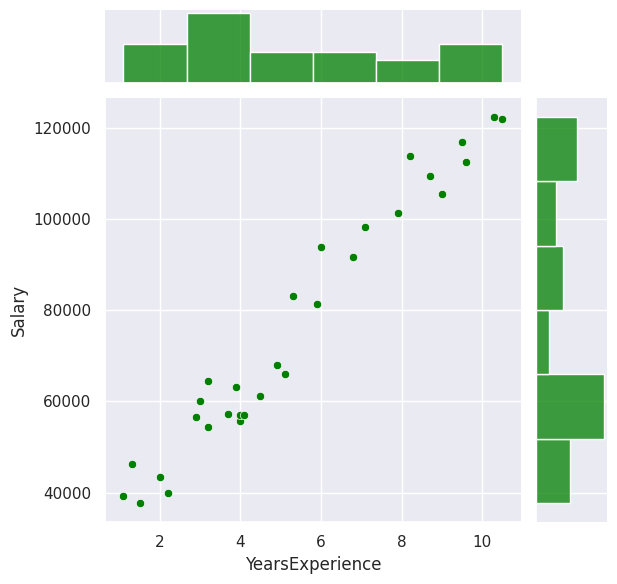

In [8]:
#Visualizing distribution of data with seaborn
import seaborn as sns
sns.set_theme(style="darkgrid")
# Use JointGrid directly to draw a custom plot
sns.jointplot(data=df, x=df['YearsExperience'], y=df['Salary'],color='green')


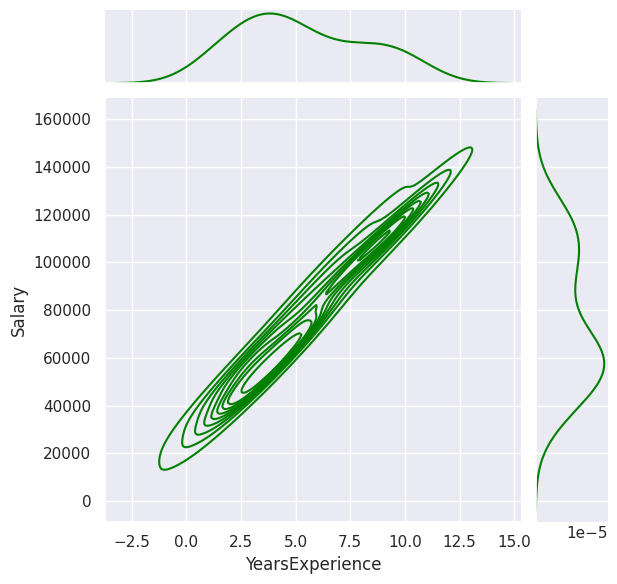

In [9]:
sns.jointplot(data=df, x=df['YearsExperience'], y=df['Salary'],color='green',kind='kde')

<Axes: xlabel='Salary'>

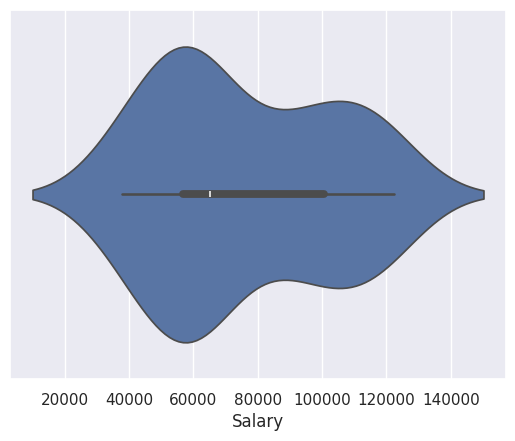

In [10]:
sns.violinplot(data=df,x=df['Salary'])

<Axes: xlabel='Salary'>

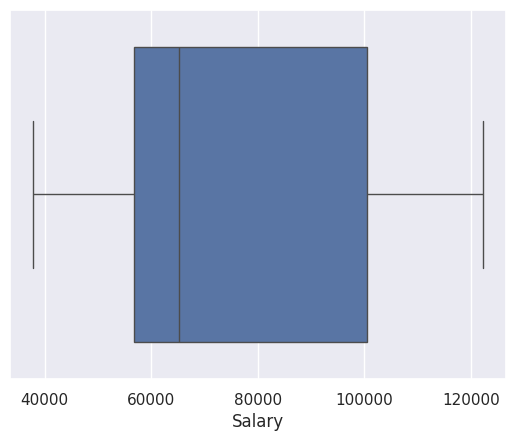

In [11]:
sns.boxplot(data=df,x=df['Salary'])  # Checking outliers if any

<Axes: ylabel='YearsExperience'>

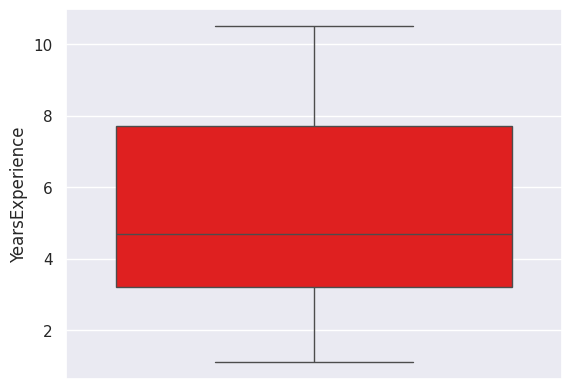

In [43]:
sns.boxplot(data=df,y=df['YearsExperience'],color="red")

In [13]:
x=df['YearsExperience'].values.reshape(-1,1)
y=df['Salary'].values.reshape(-1,1)

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [15]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [16]:
y_pred=lr.predict(x_test)

In [20]:
mse=mean_squared_error
mae=mean_absolute_error
rmse=math.sqrt(mse(y_test,y_pred))
mean_abs_error=mean_absolute_error(y_test,y_pred)
print("Root Mean Squared Error :" , round(rmse,0))
print("Mean_abs_error :",round(mean_abs_error,0))

Root Mean Squared Error : 7059.0
Mean_abs_error : 6286.0


In [21]:
predict=y_pred.flatten()

In [22]:
y_test.flatten()

array([112635,  67938, 113812,  83088,  64445,  57189])

In [23]:
dataframe=pd.DataFrame({"Actual":y_test.flatten(),"Predicted":y_pred.flatten()})

In [24]:
dataframe # Actual and predicted values

,Actual,Predicted
0,112635,115790.210113
1,67938,71498.278095
2,113812,102596.868661
3,83088,75267.804224
4,64445,55477.792045
5,57189,60189.699707


<Axes: >

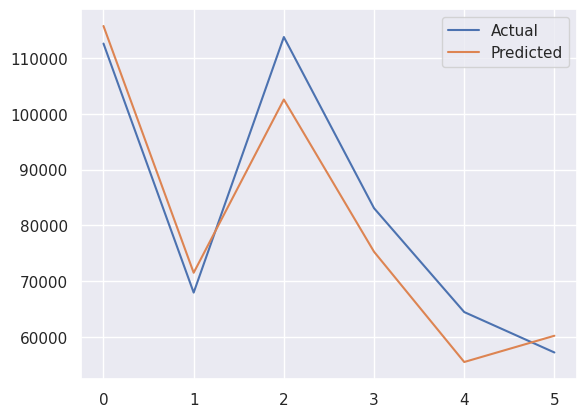

In [27]:
dataframe.plot()

In [28]:
dataframe['Variance']=dataframe['Actual']-dataframe['Predicted']

In [29]:
dataframe

,Actual,Predicted,Variance
0,112635,115790.210113,-3155.210113
1,67938,71498.278095,-3560.278095
2,113812,102596.868661,11215.131339
3,83088,75267.804224,7820.195776
4,64445,55477.792045,8967.207955
5,57189,60189.699707,-3000.699707


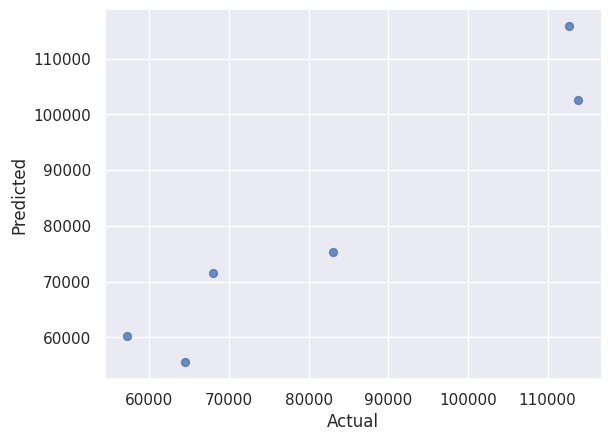

In [ ]:
# @title Actual vs Predicted

from matplotlib import pyplot as plt
dataframe.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)